<a href="https://colab.research.google.com/github/Kaiaysez/Estimating-potting-probability-in-billiards/blob/main/Pool_Image_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os # Iterate through directories and join paths
import cv2 # For doing image operations
import tensorflow as tf
from tensorflow import keras
import pickle
import random


"""Specifying data directory, formating images and visualizing images."""

DATADIR = "/content/drive/MyDrive"
CATEGORIES = ["Missed","Potted"]

IMG_SIZE = 150 # Constant for resizing image

In [ ]:
training_data = [] # List containing [image,class] lists where image is a matrix, and class is 0 or 1
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # Path to Miss and Success folder location
        class_no = CATEGORIES.index(category) # The index of category in the list CATEGORIES
        for img in os.listdir(path): # For each image in the Miss/Success folder
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # cv2 function to read images as arrays
            img_array = img_array[415:784,370:762] # Cropping the image
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # Resizes the image. If IMG_SIZE is a small number,
                                                                    # the images will be extremely blurry. I am guessing 
                                                                    # that the resizing is done via some sort of filter.
            training_data.append([new_array, class_no]) # Append training_data with a list containing the image, and the
                                                        # class it belongs to
            
create_training_data()
    

random.shuffle(training_data)

X = [] # features (every pixel is a feature, so we have 150x150 = 22500 features)
y = [] # labels
for images,labels in training_data:
    X.append(images)
    y.append(labels)
    
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
# X = X.astype('float32')
X = X/255
y = np.array(y)


In [ ]:
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=(150,150,1)),
   keras.layers.Conv2D(64, 3, activation='relu'),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer = "adam",
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ["accuracy"])

model.fit(X,y, epochs = 50, batch_size = 150)

Epoch 1/50
1/1 [==============================] - 1s 828ms/step - loss: 0.6902 - accuracy: 0.4906
Epoch 2/50
1/1 [==============================] - 0s 22ms/step - loss: 1.0003 - accuracy: 0.5849
Epoch 3/50
1/1 [==============================] - 0s 23ms/step - loss: 0.6799 - accuracy: 0.5849
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 0.7005 - accuracy: 0.4245
Epoch 5/50
1/1 [==============================] - 0s 21ms/step - loss: 0.7048 - accuracy: 0.4151
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 0.6972 - accuracy: 0.4434
Epoch 7/50
1/1 [==============================] - 0s 24ms/step - loss: 0.6876 - accuracy: 0.6226
Epoch 8/50
1/1 [==============================] - 0s 22ms/step - loss: 0.6806 - accuracy: 0.5849
Epoch 9/50
1/1 [==============================] - 0s 20ms/step - loss: 0.6741 - accuracy: 0.5849
Epoch 10/50
1/1 [==============================] - 0s 19ms/step - loss: 0.6849 - accuracy: 0.5849
Epoch 11/50
1/1 [===========

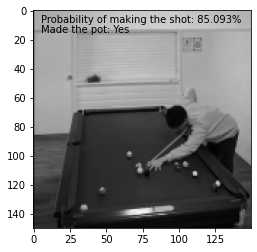

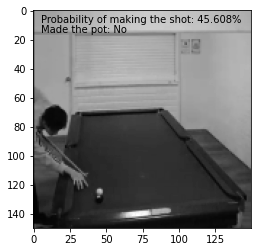

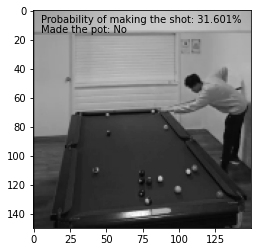

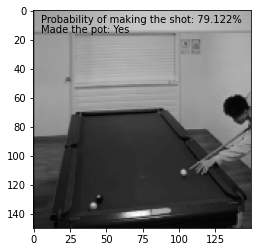

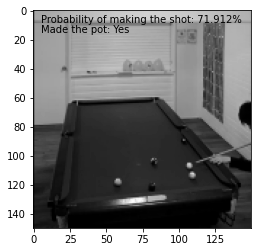

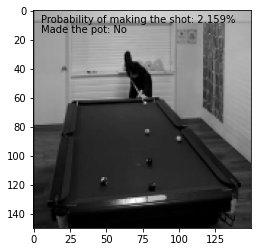

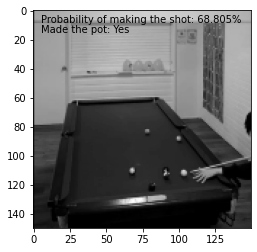

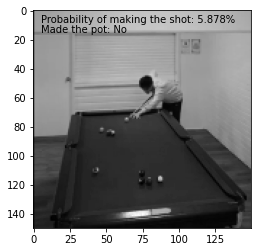

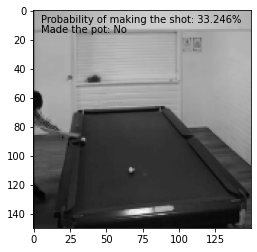

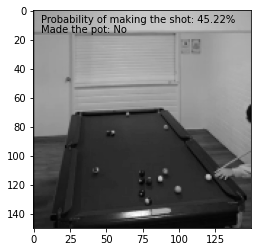

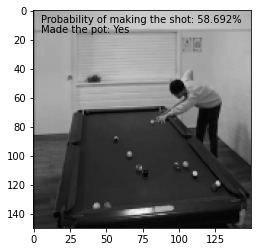

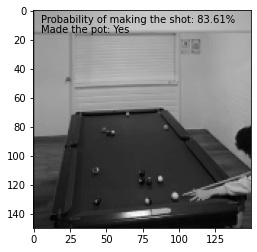

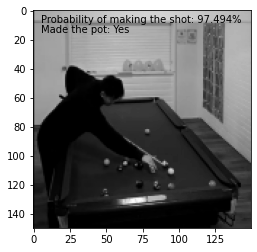

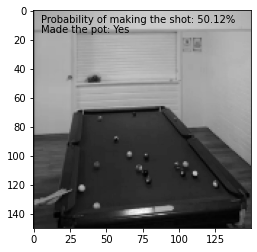

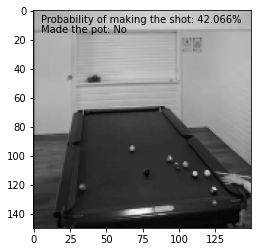

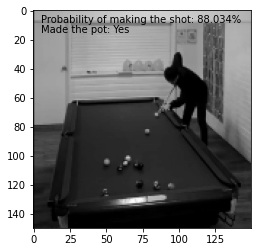

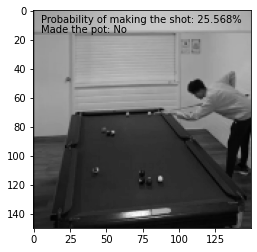

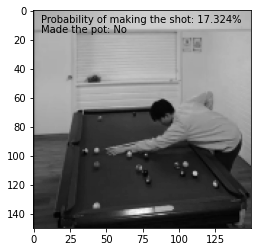

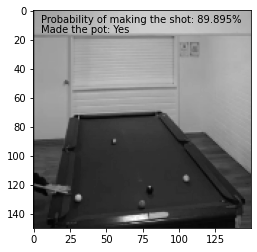

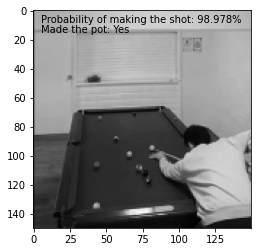

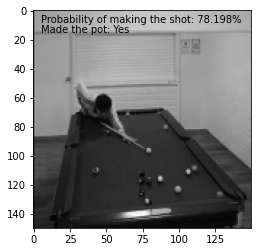

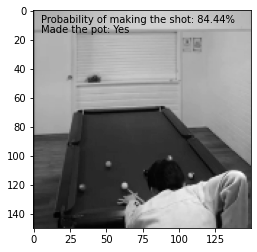

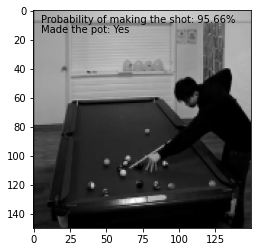

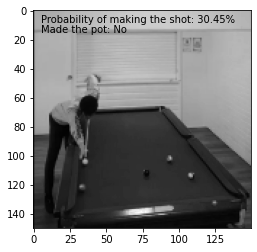

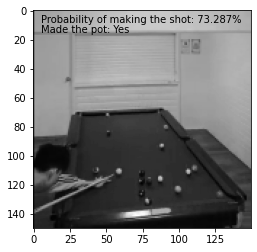

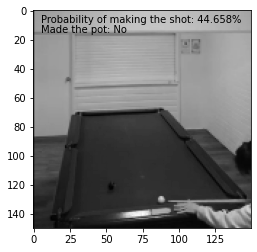

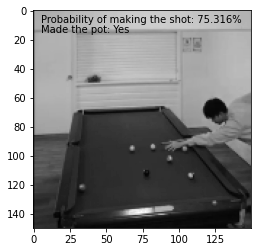

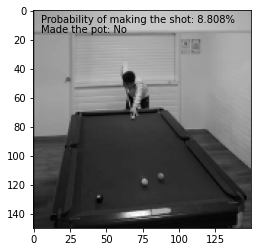

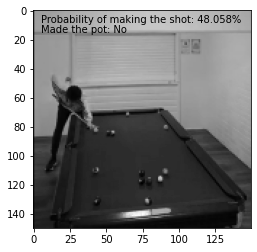

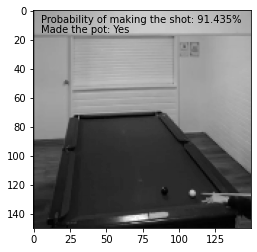

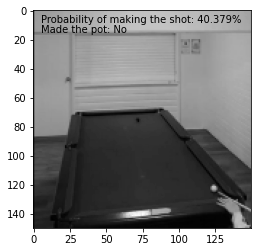

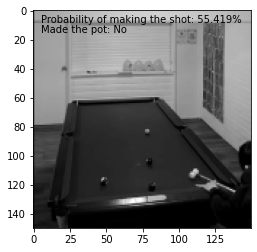

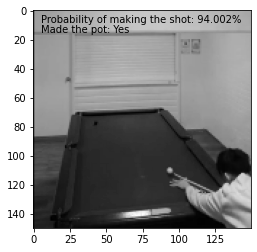

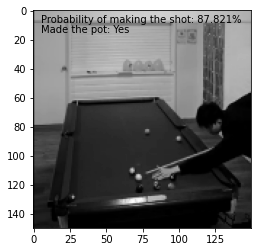

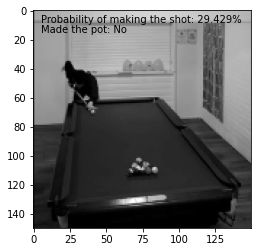

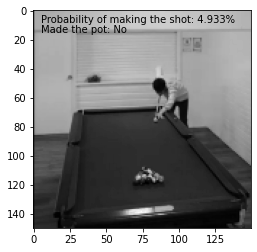

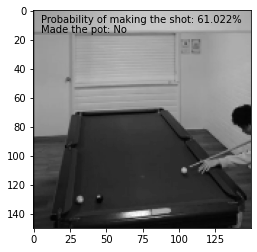

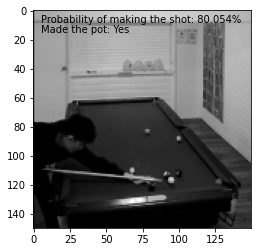

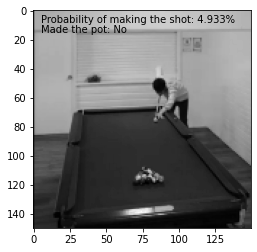

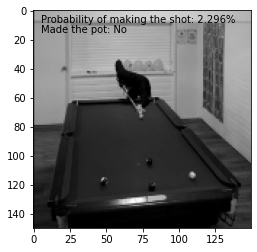

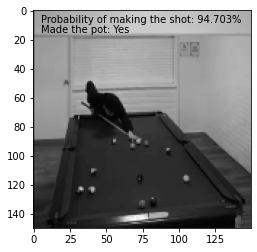

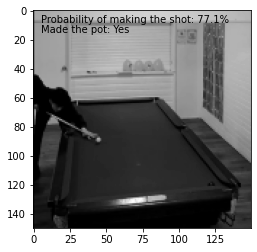

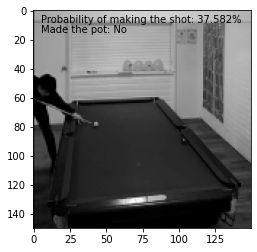

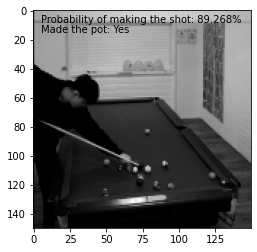

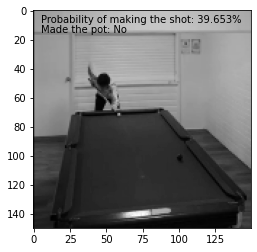

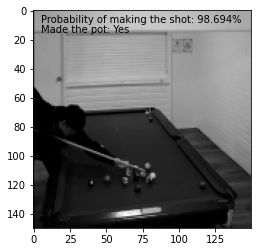

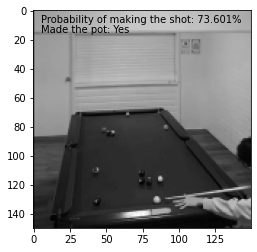

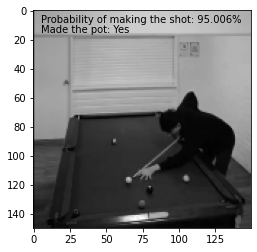

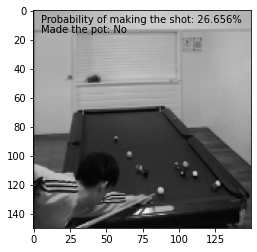

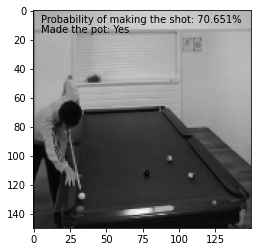

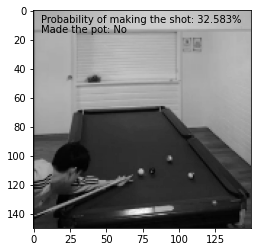

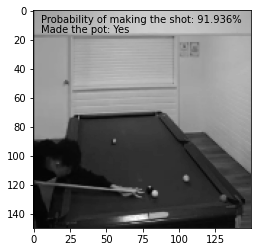

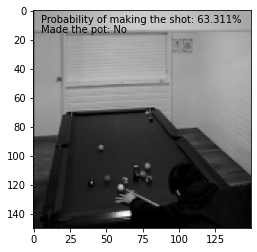

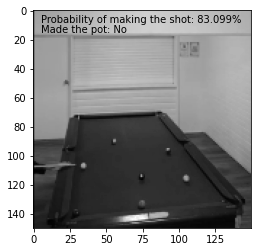

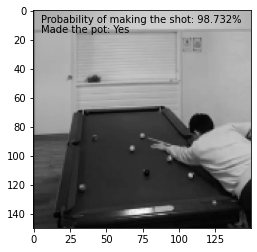

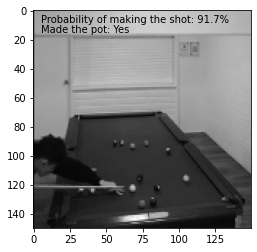

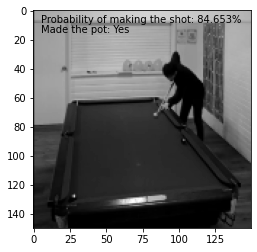

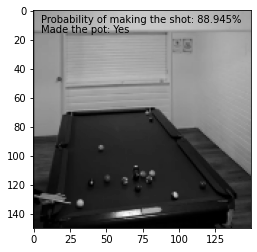

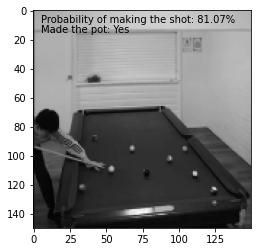

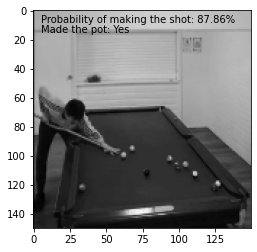

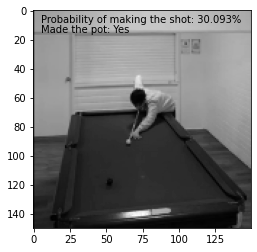

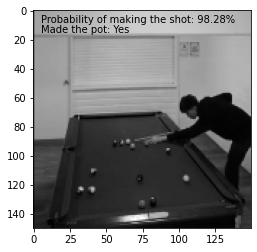

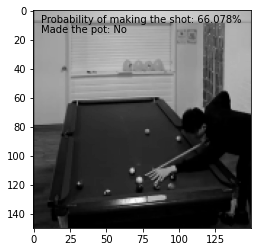

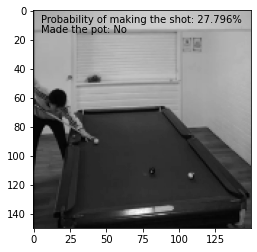

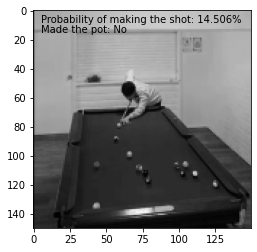

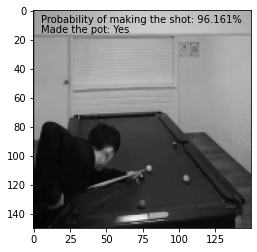

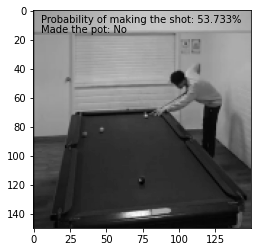

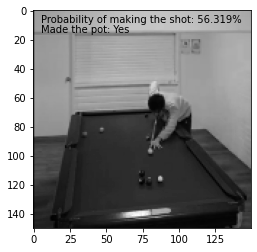

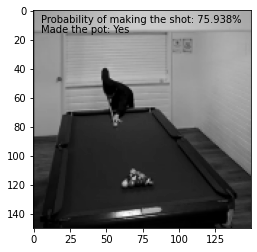

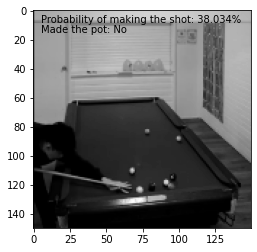

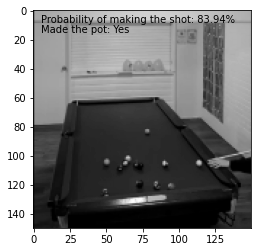

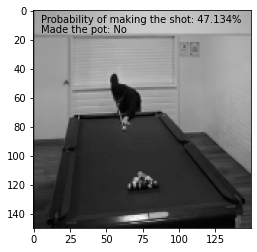

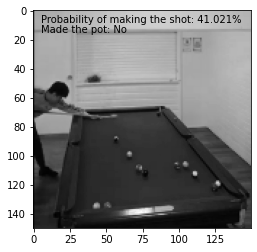

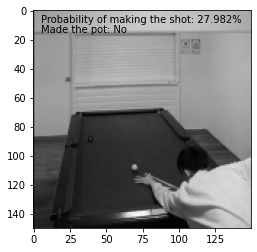

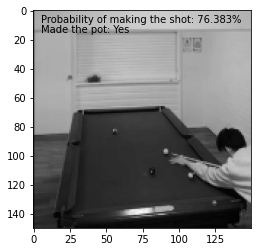

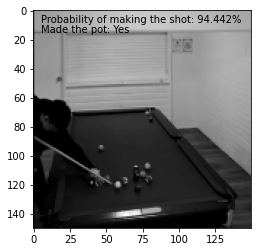

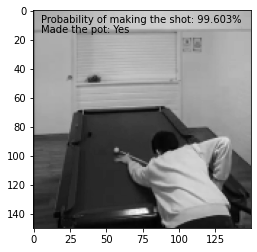

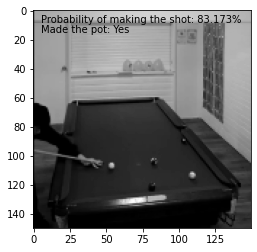

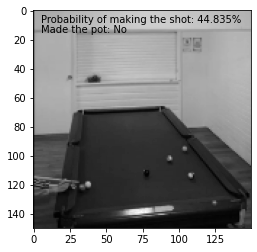

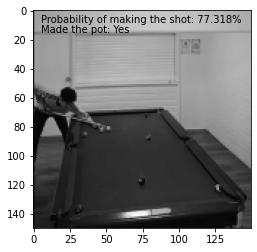

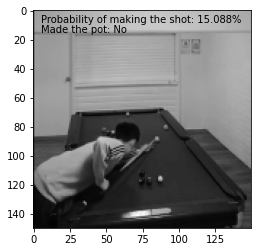

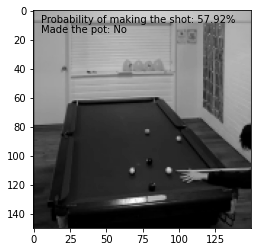

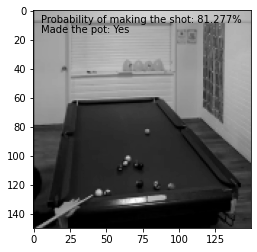

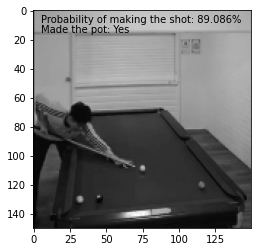

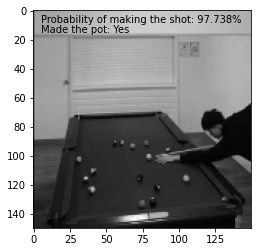

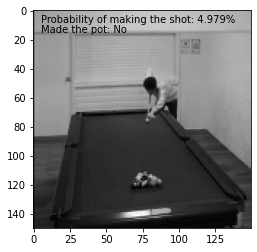

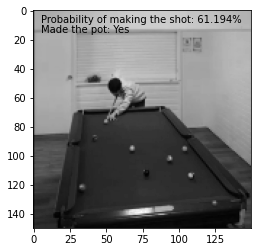

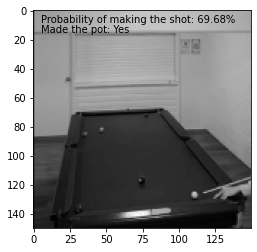

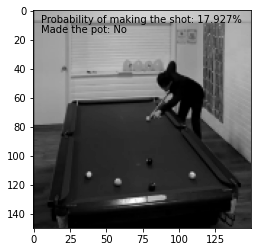

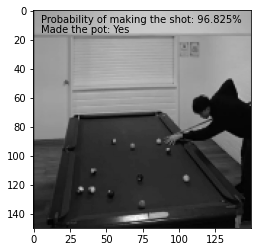

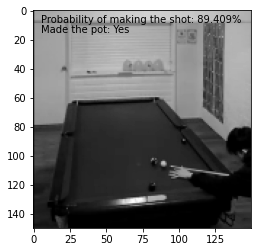

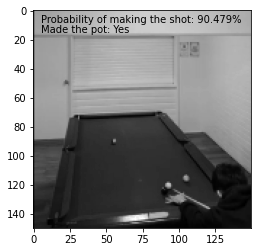

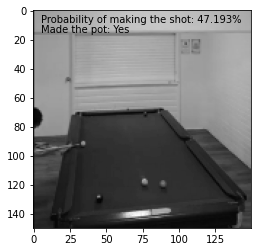

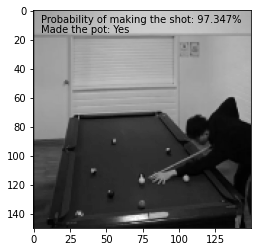

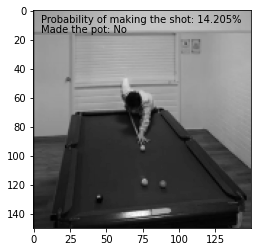

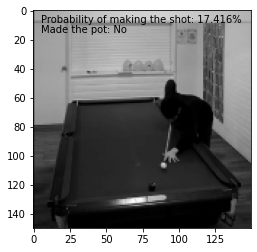

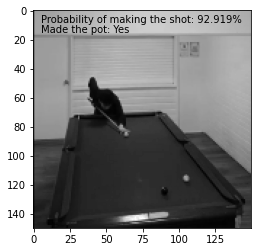

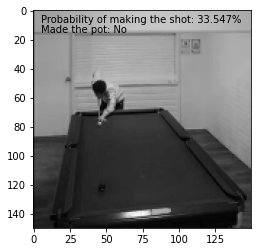

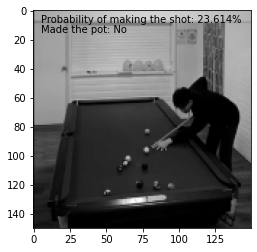

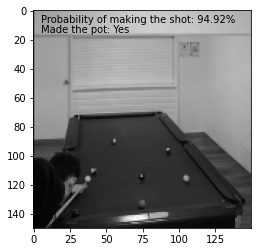

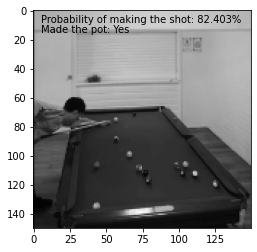

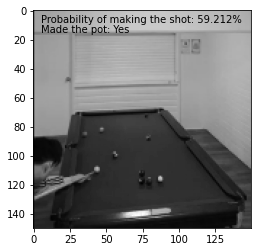

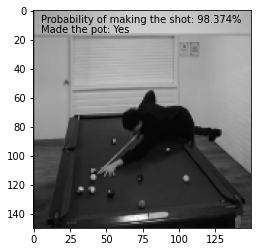

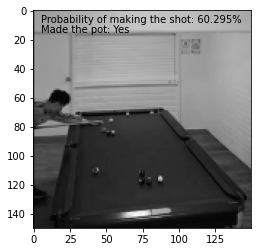

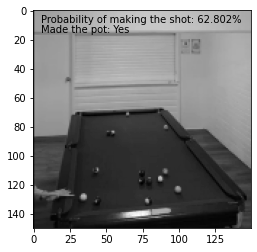

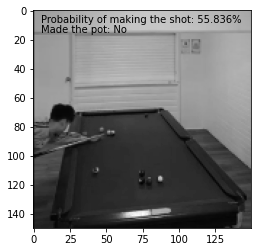

In [ ]:

def predict(img_array,label = 2):
    plt.imshow(img_array.reshape(150,150), cmap = "gray")
    plt.annotate("Probability of making the shot: " +
                 str(np.round(model.predict(img_array.reshape(1,150,150,1))[0][1]*100,3)) +
                 "%", (5,8))
    if label == 0:
        plt.annotate("Made the pot: No", (5,15))
    if label == 1:
        plt.annotate("Made the pot: Yes", (5,15))
    plt.show()
  
for i in range(len(X)):
    predict(X[i],y[i])

In [ ]:
print(np.round(model.predict(X),3))

[[0.149 0.851]
 [0.544 0.456]
 [0.684 0.316]
 [0.209 0.791]
 [0.281 0.719]
 [0.978 0.022]
 [0.312 0.688]
 [0.941 0.059]
 [0.668 0.332]
 [0.548 0.452]
 [0.413 0.587]
 [0.164 0.836]
 [0.025 0.975]
 [0.499 0.501]
 [0.579 0.421]
 [0.12  0.88 ]
 [0.744 0.256]
 [0.827 0.173]
 [0.101 0.899]
 [0.01  0.99 ]
 [0.218 0.782]
 [0.156 0.844]
 [0.043 0.957]
 [0.695 0.305]
 [0.267 0.733]
 [0.553 0.447]
 [0.247 0.753]
 [0.912 0.088]
 [0.519 0.481]
 [0.086 0.914]
 [0.596 0.404]
 [0.446 0.554]
 [0.06  0.94 ]
 [0.122 0.878]
 [0.706 0.294]
 [0.951 0.049]
 [0.39  0.61 ]
 [0.199 0.801]
 [0.951 0.049]
 [0.977 0.023]
 [0.053 0.947]
 [0.229 0.771]
 [0.624 0.376]
 [0.107 0.893]
 [0.603 0.397]
 [0.013 0.987]
 [0.264 0.736]
 [0.05  0.95 ]
 [0.733 0.267]
 [0.293 0.707]
 [0.674 0.326]
 [0.081 0.919]
 [0.367 0.633]
 [0.169 0.831]
 [0.013 0.987]
 [0.083 0.917]
 [0.153 0.847]
 [0.111 0.889]
 [0.189 0.811]
 [0.121 0.879]
 [0.699 0.301]
 [0.017 0.983]
 [0.339 0.661]
 [0.722 0.278]
 [0.855 0.145]
 [0.038 0.962]
 [0.463 0.

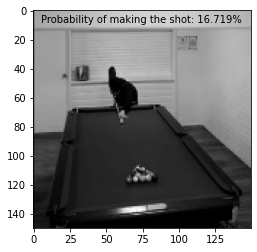

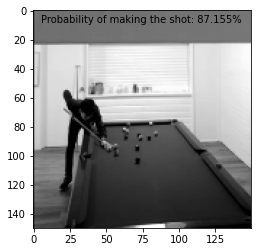

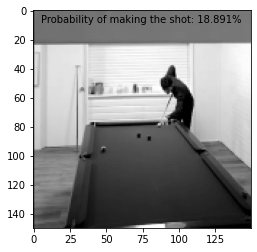

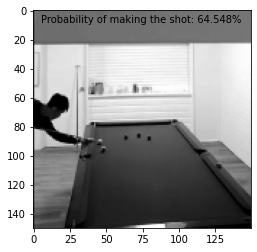

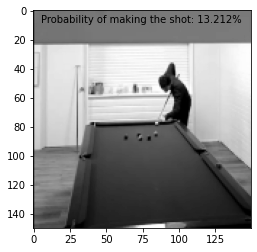

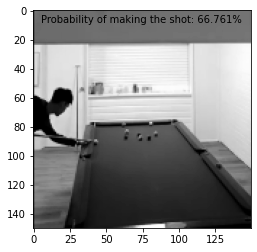

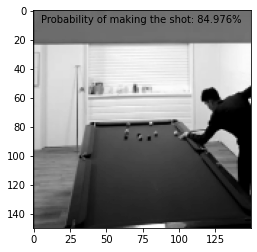

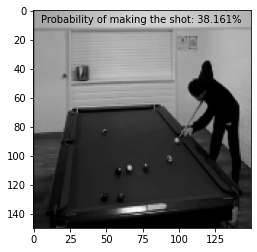

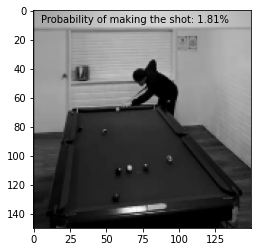

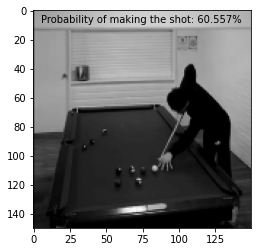

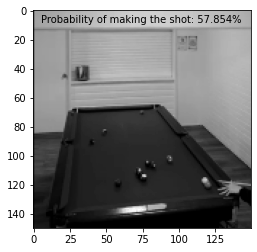

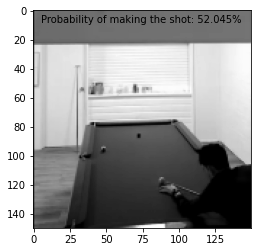

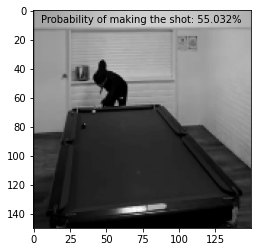

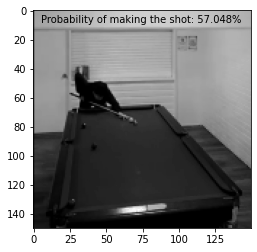

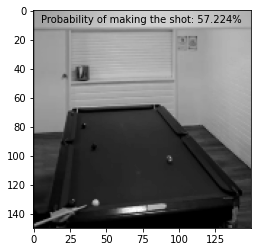

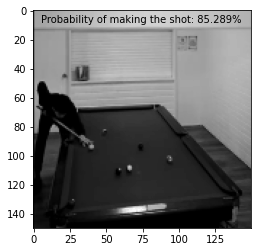

In [ ]:
def format_images(image_path):
    formatted_images = []
    for img in os.listdir(image_path):
        img_array = cv2.imread(os.path.join(image_path,img), cv2.IMREAD_GRAYSCALE) 
        # cv2 function to read images as arrays
        img_array = img_array[415:784,370:762] # Cropping the image
        img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)) # Resizing the image
        img_array = img_array/255 # Divide all pixel values by 255
        formatted_images.append(img_array)
    return formatted_images

test_images = format_images("/content/drive/MyDrive/f.files")
for i in range(len(test_images)):   
  predict(test_images[i])

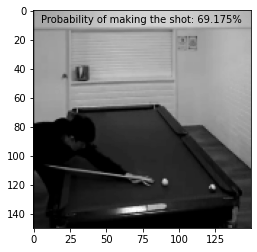

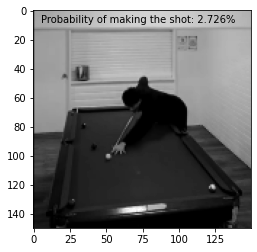

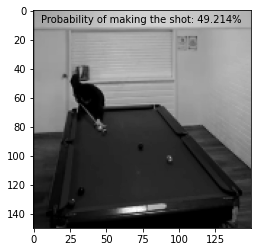

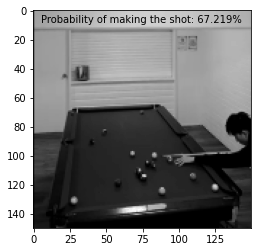

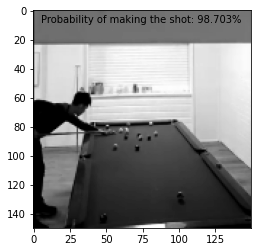

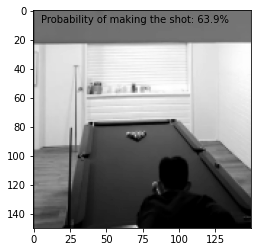

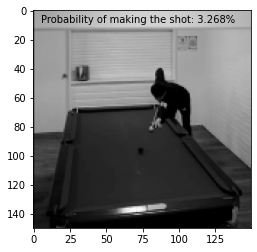

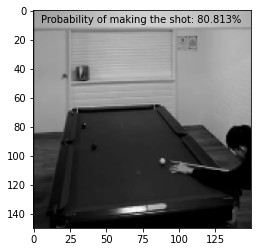

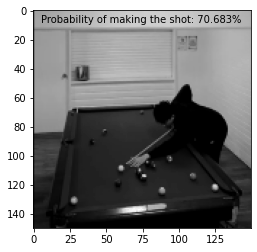

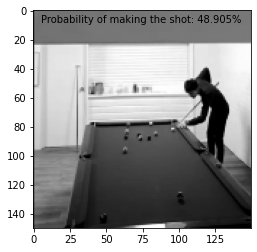

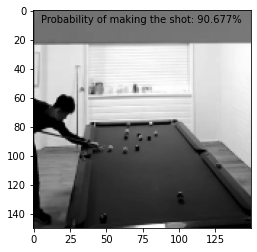

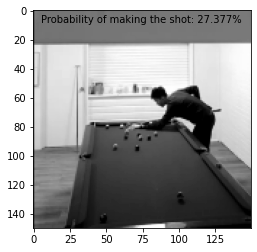

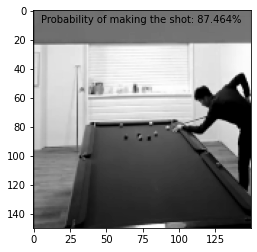

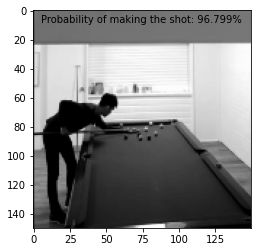

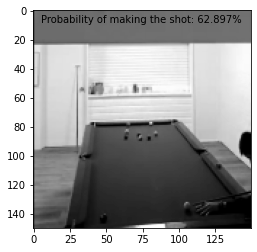

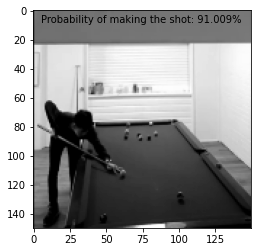

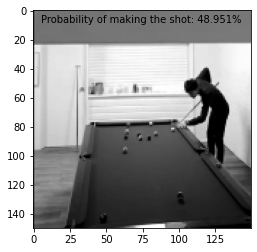

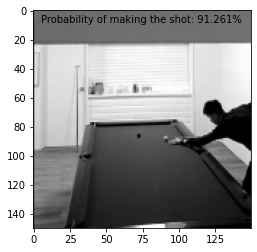

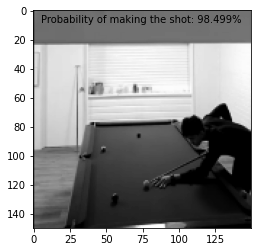

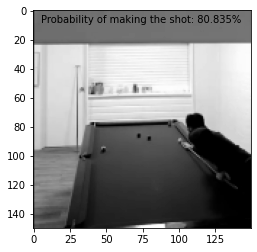

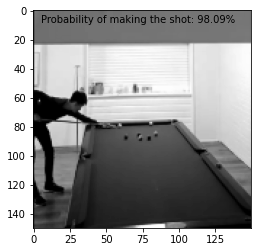

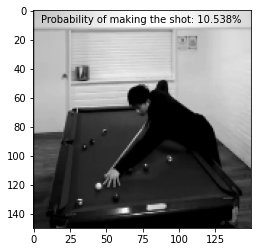

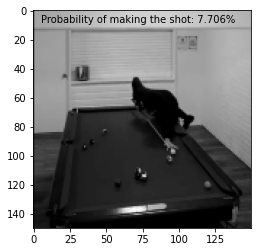

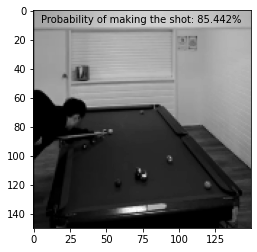

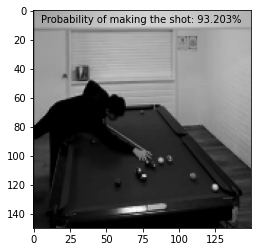

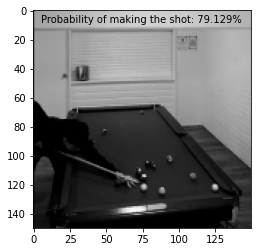

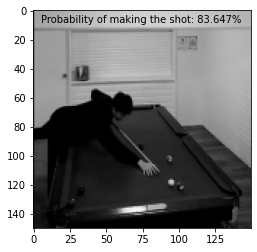

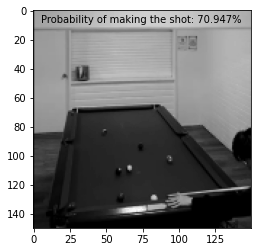

In [ ]:
test_images_s = format_images("/content/drive/MyDrive/s.files")
for i in range(len(test_images_s)):   
  predict(test_images_s[i])